In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
f=open('data/application_train.csv')
app_train = pd.read_csv(f)

In [3]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_train['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [13]:
l=app_train['AMT_ANNUITY'].isnull()
for i,item in enumerate(l):
    if item==True:
        print(i,item)

47531 True
50035 True
51594 True
55025 True
59934 True
75873 True
89343 True
123872 True
207186 True
227939 True
239329 True
241835 True


In [23]:
a = range(1,101)
import random
l=[]
for i in range(100):
    a=random.randint(0,100)
    l.append(a)

np.percentile(l, 90)

88.10000000000001

In [31]:
five_num = [0, 25, 50, 75, 100]
l=app_train[-app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY']
quantile_5s=[np.percentile(l,q=i) for i in five_num] 
quantile_5s

[1615.5, 16524.0, 24903.0, 34596.0, 258025.5]

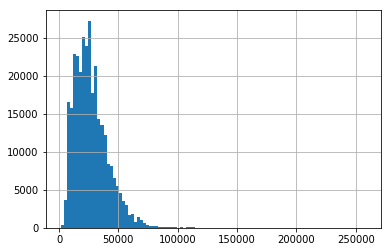

In [35]:
app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'].hist(bins = 100)

In [43]:
np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = 99)

70006.5

In [46]:
app_train[app_train['AMT_ANNUITY'] == app_train['AMT_ANNUITY'].max()]["AMT_ANNUITY"]

12108     225000.0
15501     225000.0
20119     225000.0
23582     225000.0
32100     225000.0
66528     225000.0
101007    225000.0
103006    225000.0
104938    225000.0
109209    225000.0
128189    225000.0
132913    225000.0
141371    225000.0
144204    225000.0
145673    225000.0
145707    225000.0
157614    225000.0
165190    225000.0
184287    225000.0
265026    225000.0
266148    225000.0
268278    225000.0
268455    225000.0
Name: AMT_ANNUITY, dtype: float64

In [47]:
app_train[app_train['AMT_ANNUITY'] == app_train['AMT_ANNUITY'].max()] = np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = 99)

In [48]:
l=app_train[-app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY']
quantile_5s=[np.percentile(l,q=i) for i in five_num] 
quantile_5s

[1615.5, 16524.0, 24903.0, 34596.0, 220297.5]

In [50]:
np.median(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'])

24903.0

In [51]:
from scipy.stats import mode

In [56]:
a=mode(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'])
print (a)

ModeResult(mode=array([9000.]), count=array([6385]))


In [57]:
from collections import defaultdict

In [61]:
mode_dict = defaultdict(lambda:0)
for value in app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY']:
    mode_dict[value] += 1
mode_get = sorted(mode_dict.items(), key=lambda kv: kv[1], reverse=True)
print(mode_get[0])

(9000.0, 6385)


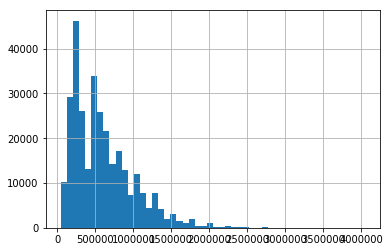

In [62]:
app_train['AMT_CREDIT'].hist(bins = 50)

In [63]:
value = app_train['AMT_CREDIT'].values
value

array([ 406597.5, 1293502.5,  135000. , ...,  677664. ,  370107. ,
        675000. ])

In [64]:
np.mean(value)

598842.7435051104

In [65]:
np.std(value)

402205.14055460837

In [66]:
app_train['AMT_CREDIT_Norm1'] = ( value - np.mean(value) ) / ( np.std(value) )

Text(0.5,1,'Normalized with Z-transform')

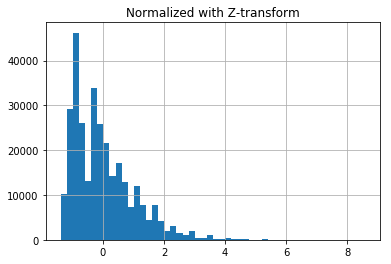

In [67]:
app_train['AMT_CREDIT_Norm1'].hist(bins = 50)
plt.title("Normalized with Z-transform")

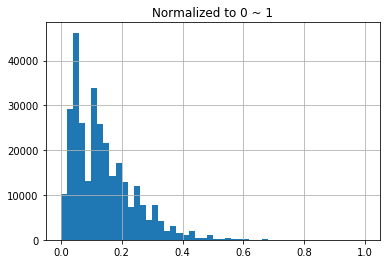

In [72]:
min(value)
max(value)
app_train['AMT_CREDIT_Norm2'] = ( value - min(value) ) / ( max(value) - min(value) )
app_train['AMT_CREDIT_Norm2'].hist(bins = 50)
plt.title("Normalized to 0 ~ 1")
plt.show()

In [96]:
f=open('data/application_train.csv')
app_train = pd.read_csv(f)
series=app_train["AMT_ANNUITY"][~app_train["AMT_ANNUITY"].isnull()]
q_all=[np.percentile(series, q=i) for i in range(101)]

In [97]:
for i,a in enumerate(q_all):
    print (i,a)

0 1615.5
1 6182.910000000001
2 6750.0
3 7875.0
4 8703.0
5 9000.0
6 9000.0
7 9553.5
8 10125.0
9 10503.0
10 11074.5
11 11430.0
12 11970.0
13 12375.0
14 12838.5
15 13302.0
16 13500.0
17 13500.0
18 13896.0
19 14350.5
20 14701.5
21 15124.5
22 15583.5
23 15970.5
24 16209.0
25 16524.0
26 16852.5
27 17109.0
28 17487.0
29 17806.5
30 18189.0
31 18643.5
32 19102.5
33 19417.5
34 19836.0
35 20151.0
36 20421.0
37 20853.0
38 21186.0
39 21609.0
40 21865.5
41 22018.5
42 22342.5
43 22527.0
44 22972.5
45 23346.0
46 23719.5
47 23931.0
48 24259.5
49 24583.589999999953
50 24903.0
51 25240.5
52 25537.5
53 25960.5
54 26217.0
55 26316.0
56 26640.0
57 26860.5
58 27189.0
59 27558.0
60 28062.0
61 28480.5
62 28917.0
63 29340.0
64 29830.5
65 30078.0
66 30483.0
67 30897.0
68 31275.0
69 31630.5
70 32004.0
71 32458.5
72 32895.0
73 33376.5
74 33984.0
75 34596.0
76 35345.16000000005
77 35806.5
78 36328.5
79 36747.0
80 37516.5
81 37948.5
82 38556.0
83 39456.0
84 40135.5
85 40806.0
86 41845.5
87 42790.5
88 43735.5
89 4499

In [100]:
print("Before replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))

Before replace NAs, numbers of row that AMT_ANNUITY is NAs: 0


In [99]:
app_train.loc[app_train['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = q_50=q_all[50]

In [110]:
value=app_train['AMT_ANNUITY'].values
l=[]
min0=min(value)
max0=max(value)
dif=max0-min0
for a in value:
    a=a-min0
    a=a/dif
    l.append(a)

In [113]:
app_train['AMT_ANNUITY_NORMALIZED'] =l
app_train['AMT_ANNUITY_NORMALIZED'].describe()

count    307511.000000
mean          0.099423
std           0.056525
min           0.000000
25%           0.058143
50%           0.090821
75%           0.128624
max           1.000000
Name: AMT_ANNUITY_NORMALIZED, dtype: float64

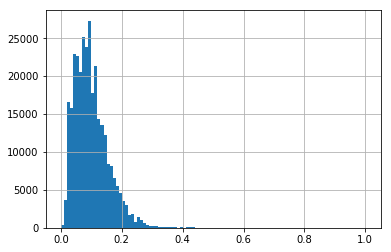

In [119]:
app_train['AMT_ANNUITY_NORMALIZED'].hist(bins=100)

In [120]:
print("Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))

Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 278


In [130]:
l=app_train['AMT_GOODS_PRICE'].value_counts().sort_values(ascending=False)
l.iloc[0]
l.index[0]

450000.0